In [384]:
import pandas as pd
import json 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
nodes = json.load(open('./node_list.json', 'rb'))
edges = json.load(open('./edge_list.json', 'rb'))

In [386]:
DirectG = nx.DiGraph()

In [387]:
#NODE Colors
color_mapping= {
    "Mondstadt" : "#aff8db",
    "Liyue": "#ffcbc1",
    "Inazuma" : "#d5aaff",
    "Snezhnaya": "#ace7ff", 
    "Sumeru" : "#A9B388",
    "Fontaine" : "#008CFF"
}

In [388]:
[DirectG.add_node(node["id"], nation=node["nation"]) for node in nodes];

In [389]:
[DirectG.add_edge(edge['From'], edge['to'], type=edge['type']) for edge in edges];

In [390]:
# Handle None values in node_colors list by assigning a default color
default_color = "#d1d1d1"
node_colors = [color_mapping.get(n[1].get("nation", default_color)) for n in list(DirectG.nodes(data=True))]
node_colors = [color if color is not None else default_color for color in node_colors]

In [391]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(DirectG, k=0.25, iterations=25)

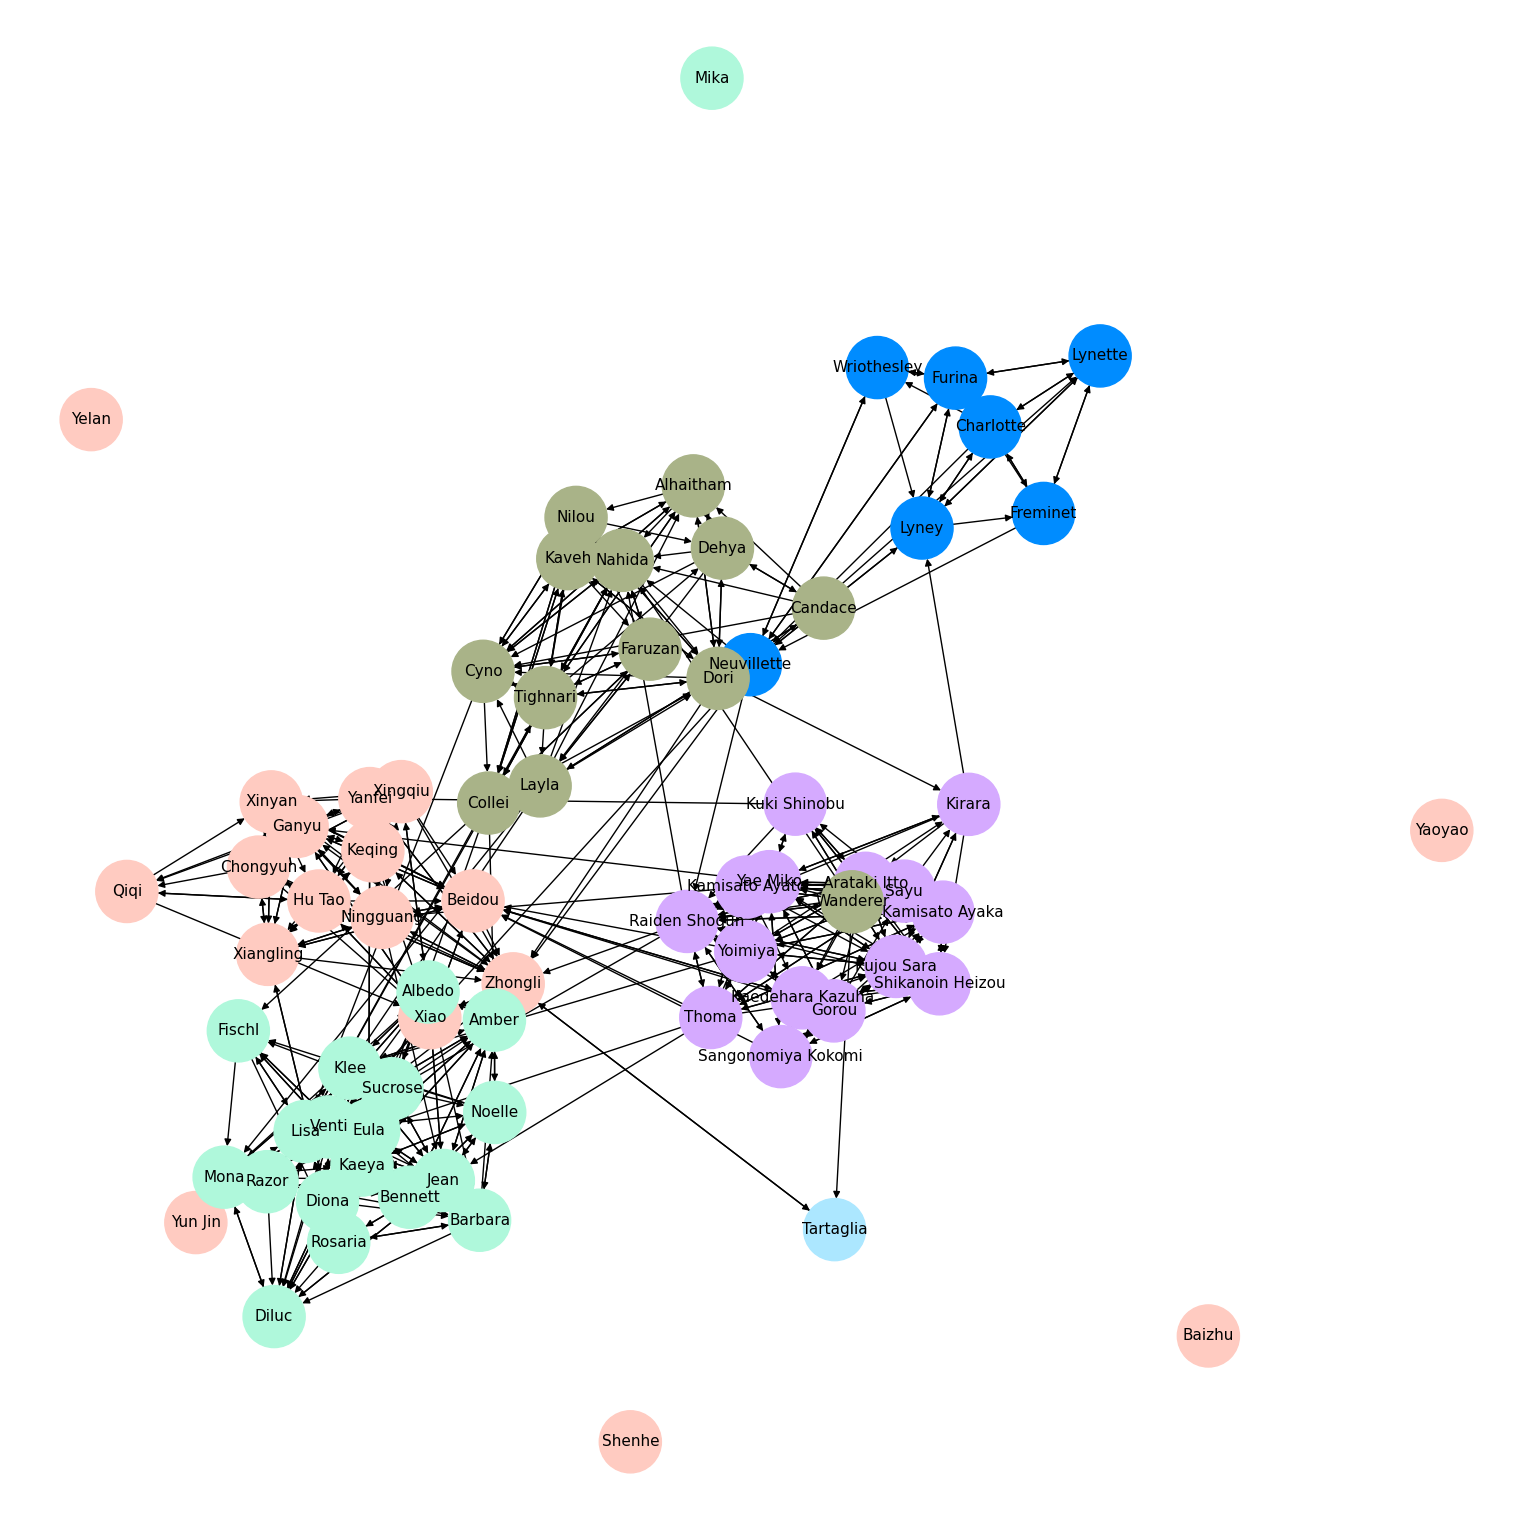

In [392]:
plt.figure(1,figsize=(15,15)) 
nx.draw(DirectG, 
        nodelist=DirectG.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colors,
        with_labels=True,
        font_size = 11,
        font_color='black')

# uncomment next line to save drawing as an image
# plt.savefig('directed.png')

plt.show()

In [393]:
DirectG.number_of_nodes()

73

In [394]:
DirectG.number_of_edges()

516

In [395]:
dir_nodes_df = pd.DataFrame(data=nodes, columns=['id', 'nation'])
dir_nodes_df['in_degree'] = dir_nodes_df['id'].apply(lambda n: DirectG.in_degree(n))
dir_nodes_df.sort_values('in_degree', ascending=False).head(70)
#higher indegree = mentioned the most

,id,nation,in_degree
51,Lisa,Mondstadt,18
57,Jean,Mondstadt,17
9,Raiden Shogun,Inazuma,16
25,Zhongli,Liyue,14
10,Yae Miko,Inazuma,14
...,...,...,...
64,Candace,Sumeru,2
60,Wanderer,Sumeru,1
58,Mika,Mondstadt,0
39,Shenhe,Liyue,0


In [396]:
# average in-degree
dir_nodes_df['in_degree'].mean()

7.068493150684931

In [397]:
dir_nodes_df['out_degree'] = dir_nodes_df['id'].apply(lambda n: DirectG.out_degree(n))
dir_nodes_df.sort_values('out_degree', ascending=False).head(30)
#out degree= measure how many characters a particular character knows.

,id,nation,in_degree,out_degree
18,Thoma,Inazuma,7,12
51,Lisa,Mondstadt,18,12
9,Raiden Shogun,Inazuma,16,12
10,Yae Miko,Inazuma,14,12
40,Kaeya,Mondstadt,13,11
12,Yoimiya,Inazuma,9,11
42,Klee,Mondstadt,13,11
45,Eula,Mondstadt,7,11
20,Kujou Sara,Inazuma,13,11
57,Jean,Mondstadt,17,11


In [398]:
# average out-degree
dir_nodes_df['out_degree'].mean()

7.068493150684931

C:\Users\tiffa\AppData\Local\Temp\ipykernel_17616\3062997739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
C:\Users\tiffa\AppData\Local\Temp\ipykernel_17616\3062997739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])


<Axes: xlabel='out_degree', ylabel='count'>

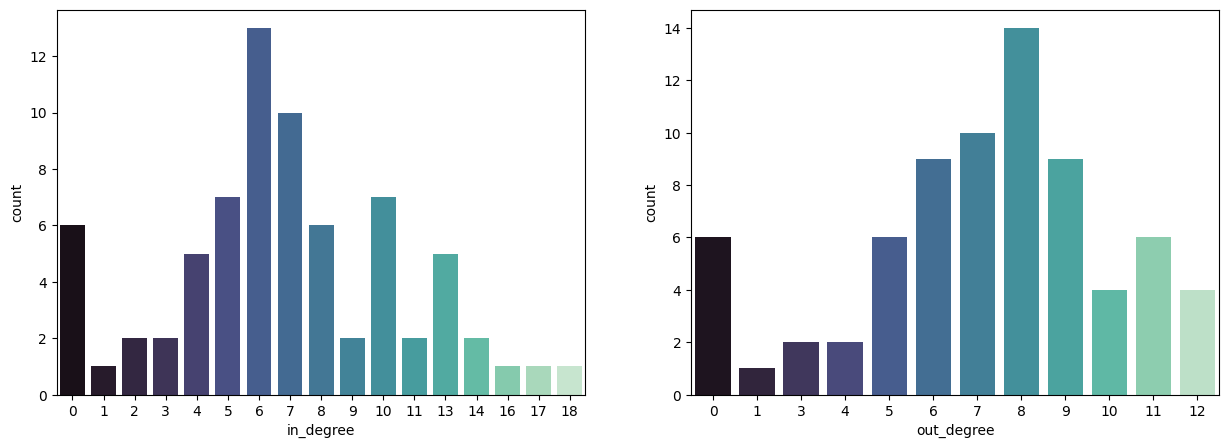

In [399]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])

In [436]:
# calculate page rank centrality
pr = nx.pagerank(DirectG)

dir_nodes_df['page_rank'] = dir_nodes_df['id'].apply(lambda n: pr[n])
dir_nodes_df[['id', 'nation', 'page_rank']].sort_values('page_rank', ascending=False).head(10)

,id,nation,page_rank
57,Jean,Mondstadt,0.038394
51,Lisa,Mondstadt,0.037833
25,Zhongli,Liyue,0.029569
40,Kaeya,Mondstadt,0.029328
42,Klee,Mondstadt,0.029304
44,Diluc,Mondstadt,0.024980
46,Albedo,Mondstadt,0.024895
48,Barbara,Mondstadt,0.023702
47,Amber,Mondstadt,0.022955
30,Beidou,Liyue,0.022427


In [437]:
#setting up undirected graph
Graph = DirectG.to_undirected(reciprocal=True)

In [438]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(Graph, k=0.25, iterations=25)
node_colors = [color_mapping[node[1]['nation']] if node[1]['nation']in color_mapping.keys() else '#d1d1d1' for node in list(Graph.nodes(data=True)) ]

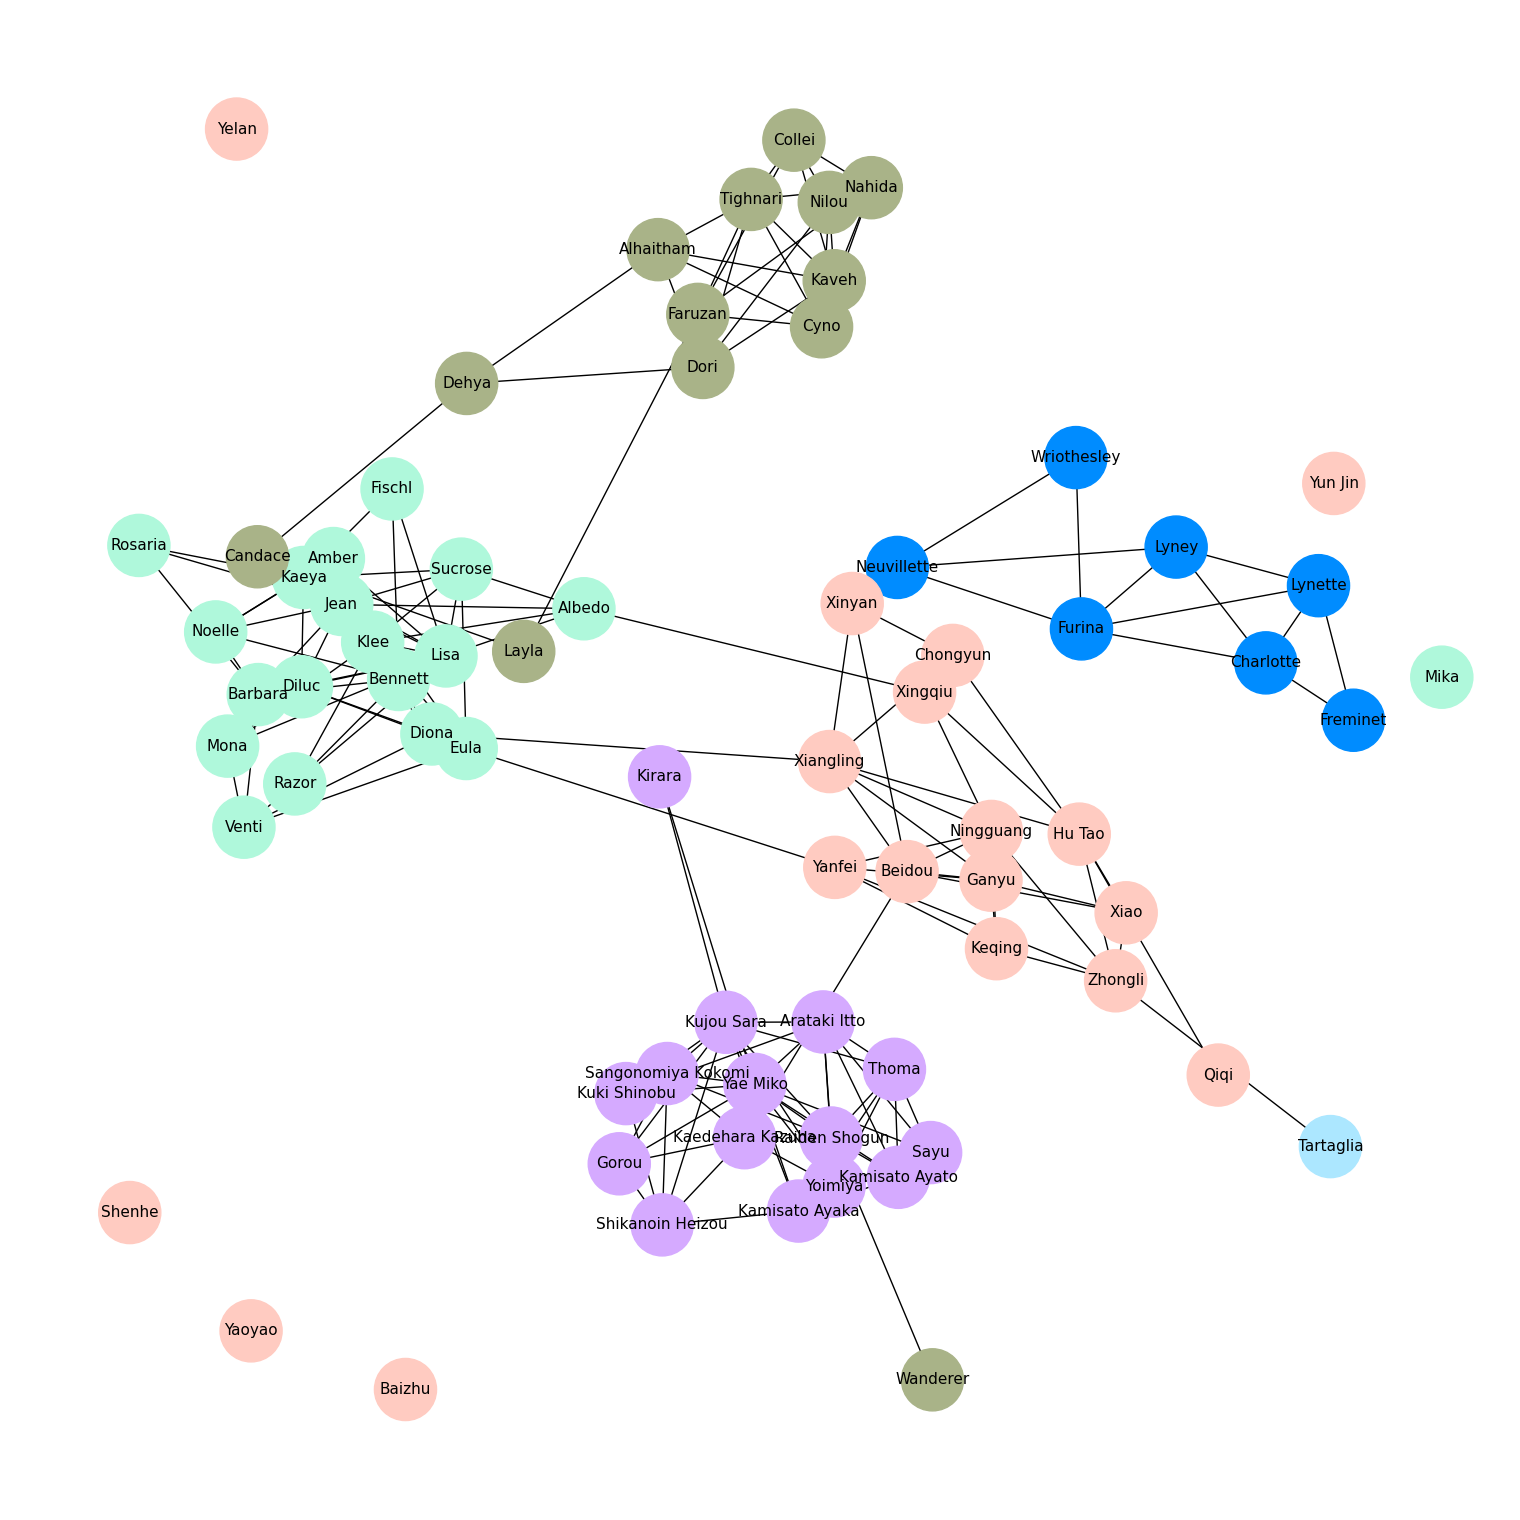

In [439]:
plt.figure(1,figsize=(15,15)) 
nx.draw(Graph, 
        nodelist=Graph.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colors,
        with_labels=True,
        font_size = 11,
        font_color='black')

# uncomment next line to save drawing as an image
# plt.savefig("undir_0.png", format="PNG")
plt.show()

In [426]:
# remove isolates from undirected graph
isolates = list(nx.isolates(Graph))
Graph.remove_nodes_from(isolates)

In [427]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(Graph, k=0.25, iterations=20)

# recolour nodes
node_colors = [color_mapping[node[1]['nation']] if node[1]['nation']in color_mapping.keys() else '#d1d1d1' for node in list(Graph.nodes(data=True)) ]

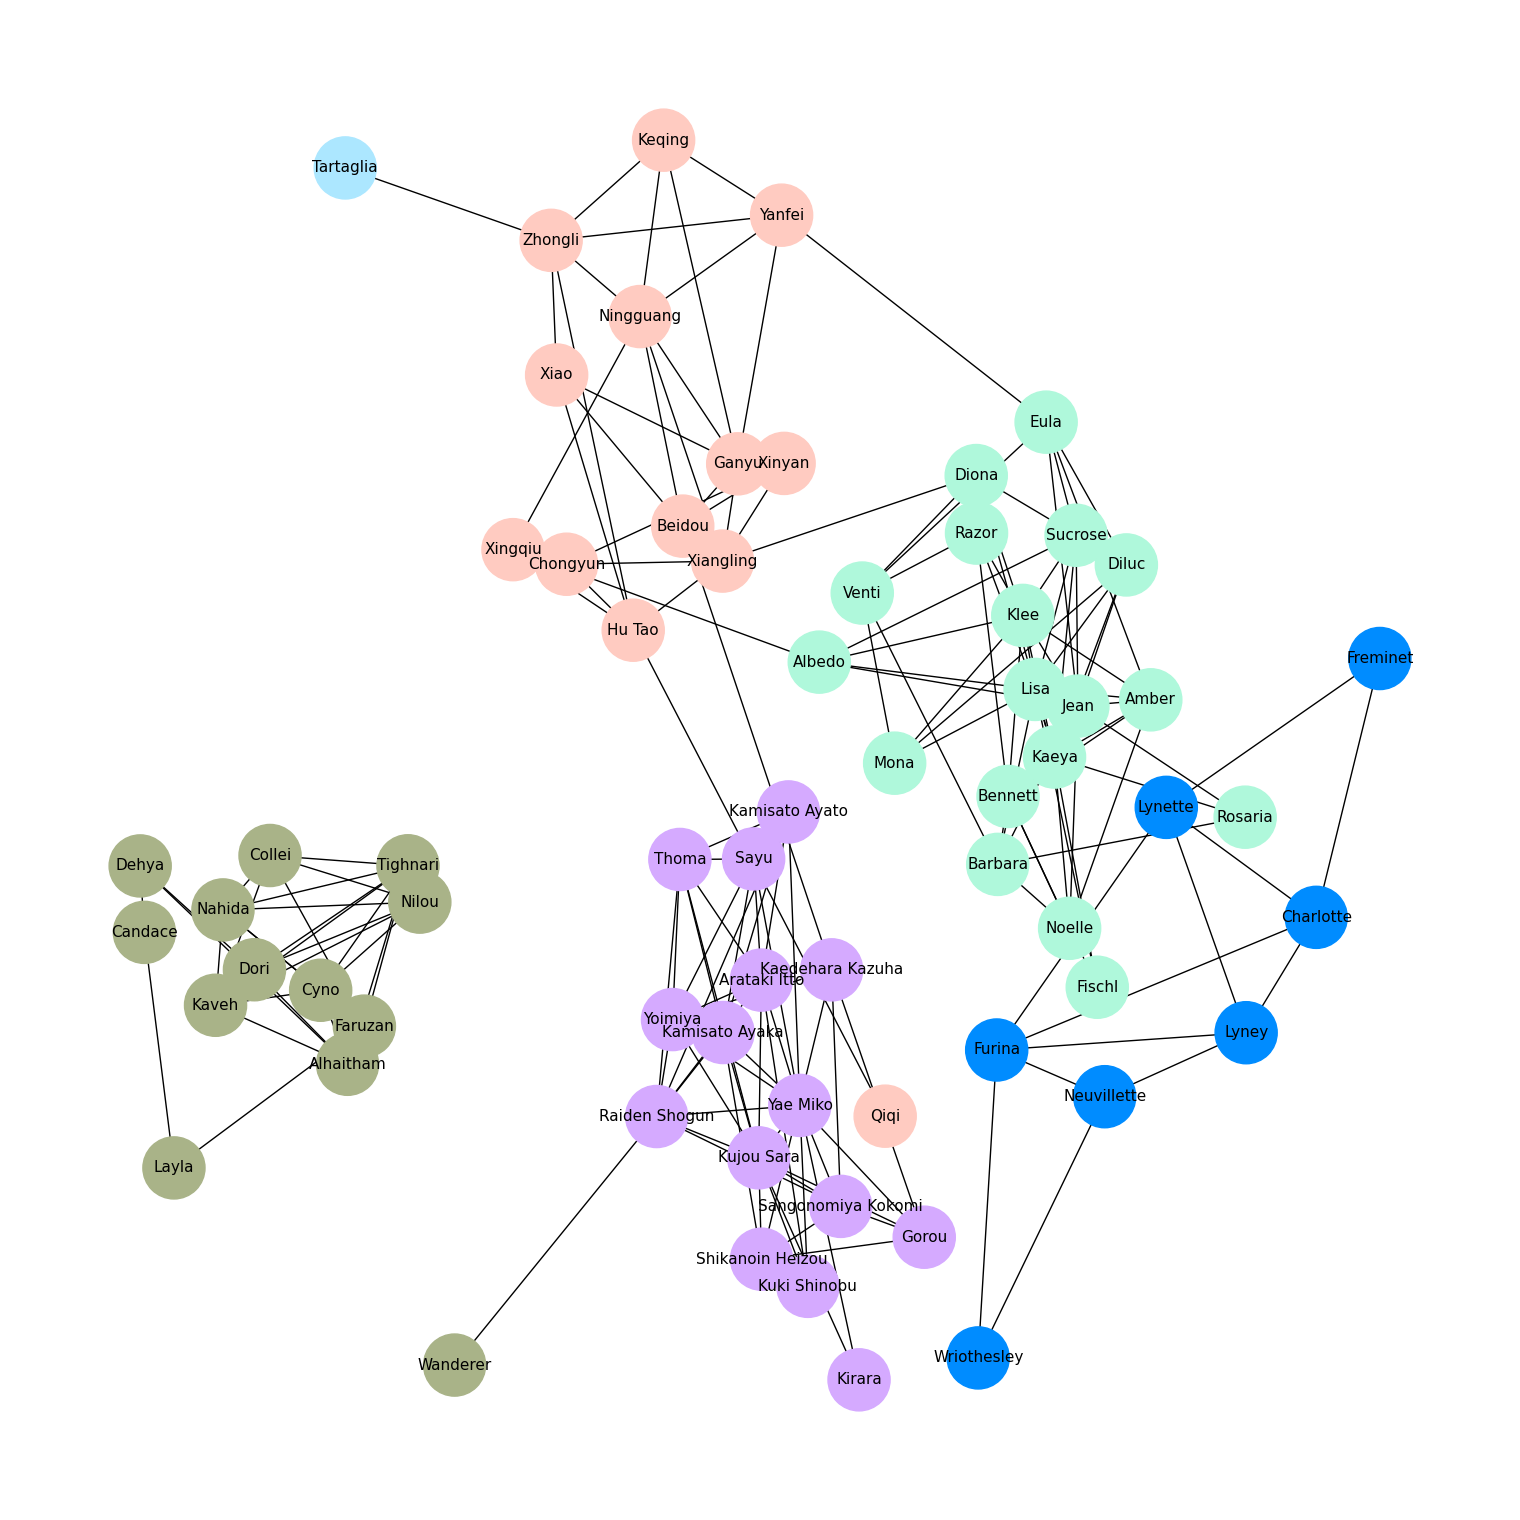

In [428]:
plt.figure(1,figsize=(15,15)) 
nx.draw(Graph, pos=pos, node_size=2000, node_color=node_colors, with_labels=True, font_size=11)

# uncomment line below to save drawing as an image
# plt.savefig("undirected_no_isolates.png", format="PNG")

In [440]:
Graph.number_of_nodes()

73

In [441]:
Graph.number_of_edges()

181

In [442]:
# initialise undirected network dataframe of characters
undir_df = dir_nodes_df[['id', 'nation']].copy()
undir_df = undir_df[~undir_df['id'].isin(isolates)]

In [443]:
undir_df['degree'] = undir_df['id'].apply(lambda n: len(Graph.edges(n)))
undir_df.sort_values('degree', ascending=False).head(30)

,id,nation,degree
20,Kujou Sara,Inazuma,11
57,Jean,Mondstadt,11
10,Yae Miko,Inazuma,11
51,Lisa,Mondstadt,11
40,Kaeya,Mondstadt,10
42,Klee,Mondstadt,10
9,Raiden Shogun,Inazuma,9
12,Yoimiya,Inazuma,8
16,Arataki Itto,Inazuma,8
7,Kamisato Ayaka,Inazuma,8


In [444]:
close_cen = nx.closeness_centrality(Graph)
# close_cen = dict(sorted(close_cen.items(), key=lambda item: item[1], reverse=True))
undir_df['closeness'] = undir_df['id'].apply(lambda node: close_cen[node])
undir_df.sort_values('closeness', ascending=False).head(10)

,id,nation,degree,closeness
24,Xiangling,Liyue,7,0.236004
30,Beidou,Liyue,6,0.232428
28,Ningguang,Liyue,7,0.220723
53,Diona,Mondstadt,5,0.216060
31,Ganyu,Liyue,6,0.214549
8,Kaedehara Kazuha,Inazuma,5,0.207301
29,Xingqiu,Liyue,4,0.204537
26,Yanfei,Liyue,5,0.204537
22,Xinyan,Liyue,3,0.197939
32,Hu Tao,Liyue,6,0.195418


In [445]:
# calcuate betweenness centrality for each character 
bet_cen = nx.betweenness_centrality(Graph)

undir_df['betweenness'] = undir_df['id'].apply(lambda node: bet_cen[node])
undir_df.sort_values('betweenness', ascending=False).head(10)

,id,nation,degree,closeness,betweenness
30,Beidou,Liyue,6,0.232428,0.196923
8,Kaedehara Kazuha,Inazuma,5,0.207301,0.188152
24,Xiangling,Liyue,7,0.236004,0.134561
53,Diona,Mondstadt,5,0.216060,0.117243
12,Yoimiya,Inazuma,8,0.177344,0.077386
28,Ningguang,Liyue,7,0.220723,0.045595
26,Yanfei,Liyue,5,0.204537,0.041992
40,Kaeya,Mondstadt,10,0.187077,0.039709
45,Eula,Mondstadt,6,0.189386,0.039112
42,Klee,Mondstadt,10,0.188224,0.032024


In [449]:
# calculate each character's eigenvector centrality
eigen_cen = nx.eigenvector_centrality(Graph)

undir_df['eigen'] = undir_df['id'].apply(lambda node: eigen_cen[node])
undir_df[['id','nation','degree','eigen']].sort_values('eigen', ascending=False).head(10)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [450]:
# initialise ranking dataframe
ranked_df = undir_df[['id', 'nation']].copy()

In [451]:
undir_df = undir_df.sort_values('degree', ascending=False)
ranked_df['degree_rank'] = undir_df['degree'].rank(method='first', ascending=False).astype(int)

In [452]:
# add rank of characters based on different undirected network centrality values
undir_df = undir_df.sort_values('closeness', ascending=False)
ranked_df['closeness_rank'] = undir_df['closeness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('betweenness', ascending=False)
ranked_df['betweenness_rank'] = undir_df['betweenness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('eigen', ascending=False)
ranked_df['eigen_rank'] = undir_df['eigen'].rank(method='first', ascending=False).astype(int)

KeyError: 'eigen'

In [453]:
# add average rank column
ranked_df['average_rank'] = ranked_df.mean(numeric_only=True, axis=1)
ranked_df.sort_values('average_rank')

,id,nation,degree_rank,closeness_rank,betweenness_rank,average_rank
24,Xiangling,Liyue,13,1,3,5.666667
28,Ningguang,Liyue,15,3,6,8.000000
30,Beidou,Liyue,25,2,1,9.333333
42,Klee,Mondstadt,5,15,10,10.000000
40,Kaeya,Mondstadt,6,17,8,10.333333
...,...,...,...,...,...,...
38,Yaoyao,Liyue,70,70,63,67.666667
39,Shenhe,Liyue,69,69,66,68.000000
37,Baizhu,Liyue,71,71,62,68.000000
34,Yelan,Liyue,72,72,65,69.666667


In [454]:
ranked_df.head(60)

,id,nation,degree_rank,closeness_rank,betweenness_rank,average_rank
20,Kujou Sara,Inazuma,1,35,23,19.666667
57,Jean,Mondstadt,3,25,21,16.333333
10,Yae Miko,Inazuma,4,37,20,20.333333
51,Lisa,Mondstadt,2,27,25,18.000000
40,Kaeya,Mondstadt,6,17,8,10.333333
42,Klee,Mondstadt,5,15,10,10.000000
9,Raiden Shogun,Inazuma,7,39,18,21.333333
12,Yoimiya,Inazuma,8,21,5,11.333333
16,Arataki Itto,Inazuma,9,40,32,27.000000
7,Kamisato Ayaka,Inazuma,10,41,28,26.333333
